In this answer, three models have been build by using given data to predict hourly entries in NYC subways .

The first model is a simple linear regression model.

The second one is a two-level regression model.

The third one is a nonparametric model.

This article is divided into 5 parts.

1, Some observations and thoughts from data.

2, General principles of models.

3, Three models.

4, Summary.

5, Possible further improvement.

##Some observtions and thoughts from data

The dataset is about ridership of NYC subways. Here is a typical record in the dataset.

In [1]:
from linear_models import load_data
dataframe = load_data()
print dataframe.iloc[0]

Unnamed: 0                  0
UNIT                     R001
DATEn              2011-05-01
TIMEn                01:00:00
Hour                        1
DESCn                 REGULAR
ENTRIESn_hourly             0
EXITSn_hourly               0
maxpressurei            30.31
maxdewpti                  42
mindewpti                  35
minpressurei            30.23
meandewpti                 39
meanpressurei           30.27
fog                         0
rain                        0
meanwindspdi                5
mintempi                   50
meantempi                  60
maxtempi                   69
precipi                     0
thunder                     0
Name: 0, dtype: object


Following is the meaning of various data fields in this record.

Unnamed: 0: Meaningless.

UNIT: Remote unit that collects turnstile information. Can collect from multiple banks of turnstiles. 
Large subway stations can have more than one unit. 

DATEn: Date in “yyyy-mm-dd” (2011-05-21) format. 

TIMEn: Time in “hh:mm:ss” (08:05:02) format. 

hour: Hour of the timestamp from TIMEn. Truncated rather than rounded. 

DEScn: Represent the "REGULAR" scheduled audit event (occurs every 4 hours).

ENTRIESn_hourly: Difference in ENTRIES from the previous REGULAR reading. 

EXITSn_hourly: Difference in EXITS from the previous REGULAR reading.

maxpressurei: Maximum pressure in inHg.

maxdewpti: Maximum dewpoint in F.

mindewpti: Minimum dewpoint in F.

minpressurei: Minimum pressure in inHg.

meandewpti: Mean dewpoint in F.

meanpressurei: Mean pressure in inHg.

fog: Indication of appearance of fog.

rain: Indication of appearance of rain.

meanwindspdi: Mean windspeed in mph.

mintempi: Minimum temperature in F.

meantempi: Mean temperature in F.

maxtempi: Maximum temperature in F.

precipi: Precipitation in inches.

thunder: Indication of appearance of thunder.

A model should be build based on the dataset. In this model the date item "ENTRIESn_hourly" is the value to be predicted. This is the output of the model. The other items which represent date, time and weather conditions are the values used to predict "ENTRIESn_hourly". These are inputs of the model. These inputs are also called features. The centre task of model is using features to calculate output. 

Since this task is to predict numerical values. The simplest model is by unifying some features into a simple linear models. The simple linear model have following form.

\begin{equation*}
y=\beta_1*x_1+\beta_2*x_2+...+\beta_k*x_k+\epsilon
\end{equation*}

$y$ is the output. $x_1, x_2...x_k$ are the values of features. $\beta_1, \beta_2...\beta_k$are so called weights or coefficients which will be determined by training process. $\epsilon$ is the estimated error.

Assumptions are made by utlizing this simple linear model. One important assumption is independence of features. That is the change of one feature will not effect other features. However, some observations may indicate that the features may be dependent on each other. Here is the form that show some correlation between feature "rain" and fearure "hour" in a particular turnstile. The values in the form is the average "hourly_entries" given the "rain" and "hour".

In [1]:
from observations import rain_correlated_time
unit_number = 1
time_number = 5
print rain_correlated_time(unit_number, time_number)

              no_rain    rain
17:00:00  5734.750000  5259.2
13:00:00  6423.850000  6538.6
09:00:00  4340.736842  4554.5
01:00:00  1990.263158  1711.6
21:00:00  4644.157895  4900.4


As we can see, for some "hour", the average "hourly_entries" is higher when "rain" is 1. And for other, the average "hourly_entries" is lower. This observation shows that the feature "rain" is dependent on the feature "hour". This observation is intuitive. When it is raining(corresponding to feature "rain") in mid-night(corresponding to feature "hour"), the ridership of subway may not be affected by rain. And if it was raining in rush hour, more people may take subway to work because the traffic on the road may become terrible in rainy days. These thoughts on causation may not be accurate. The centre idea is features are not independent. A model with consideration of correlation should be build. Here is a typical formula of two-level regression.

\begin{align*}
&y=\beta_1(u_1,u_2...u_l)*x_1+\beta_2(u_1,u_2...u_l)*x_2+...+\beta_k(u_1,u_2...u_l)*x_k+\epsilon \\
&\beta_1(u_1,u_2...u_l) = f_1(u_1,u_2...u_l) \\
&\beta_2(u_1,u_2...u_l) = f_2(u_1,u_2...u_l) \\
&... \\
&\beta_k(u_1,u_2...u_l) = f_k(u_1,u_2...u_l)
\end{align*}

$y$ is the output. $x_1, x_2...x_k$ are the values of level-two features. $\beta_1(u_1,u_2...u_l), \beta_2(u_1,u_2...u_l)...\beta_k(u_1,u_2...u_l)$are so called coefficients functions which will be determined by  model and training process. $\epsilon$ is the estimated error. $u_1, u_2...u_l$ are values of level-one features.

Furthermore, when people talked about crowedness of the subways. They may say, there are a lot people in this station 5:00 pm yestoday and a lot people will be in this station at the same time. Following figures show ridership in different days at and in one particular station.

Populating the interactive namespace from numpy and matplotlib


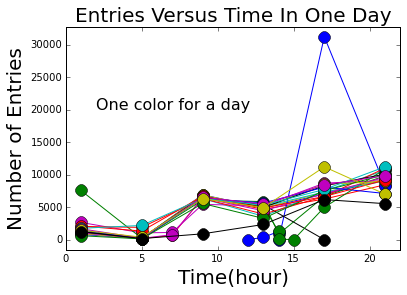

<module 'matplotlib.pyplot' from '/home/adenguo/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [1]:
%pylab inline
from observations import plot_daily_data
import observations
unit_number = 1
plot_daily_data(unit_number)

As the picture reveals, the ridership is periodical. The similar amount of hourly entries will appear repeatedly based on same time of different days. This provide the philosophy of non-parametric model. The general formula of non-parametric model is as following.

\begin{equation*}
y=f(D_1, D_2,...D_n)
\end{equation*}

$y$ is the output. $D_1, D_2, ...D_n$ are records from dataset. $f()$ is a general form of function.

##General principles of model constructions